<a href="https://colab.research.google.com/github/Ichigoboy12/AI/blob/main/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI/HW-classification.csv')
names = ['index','sepal leghth(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class']
data.head()

,Unnamed: 0,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0,141,6.9,3.1,5.1,2.3,2
1,1,11,4.8,3.4,1.6,0.2,0
2,2,81,5.5,2.4,3.7,1.0,1
3,3,6,4.6,3.4,1.4,0.3,0
4,4,137,6.4,3.1,5.5,1.8,2


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)


param_grid = {
    'n_neighbors': [ 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train_resampled)

# Best model
best_knn = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Evaluate on test data
y_pred = best_knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Test Accuracy: 98.00%


In [ ]:
y = data['class'].values  # Extract the 'class' column as target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.84

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_pca, y_train_resampled)
train_losses = []
val_losses = []

knn.score(X_test_pca, y_test)
test_accuracy = knn.score(X_test_pca, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 98.00%


In [ ]:
y_pred = knn.predict(X_test_pca)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0
1,2,2
2,1,1
3,2,2
4,2,2
5,0,0
6,1,1
7,1,1
8,1,1
9,2,2


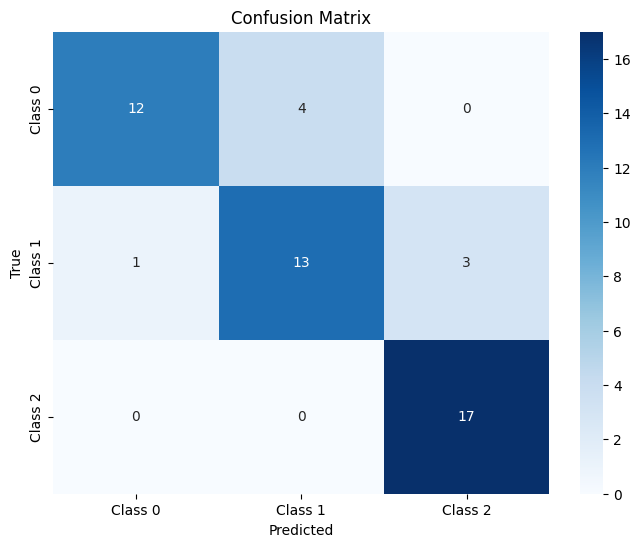

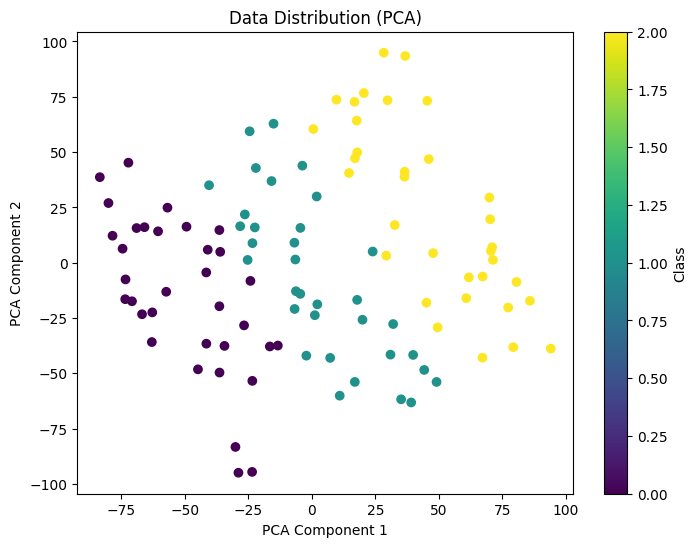

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import SMOTE


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)


knn_best = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_best.fit(X_train_pca, y_train_resampled)
y_pred_best = knn_best.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_resampled, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data Distribution (PCA)')
plt.colorbar(label='Class')
plt.show()
